In [1]:
import torch
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt

In [3]:
# file = '../correlations_measurements/diffused_ILSVRC2012_validation/correlations_deltaX-t_10_250-magnitude.pk'
file = '/home/sclocchi/data/correlations_deltaX-t_100_250-magnitude.pk'

with open(file, 'rb') as f:
    data = pickle.load(f)



In [4]:
print(data.keys())
C = data['corr'].reshape(256*256, 256*256) - data['mean'].reshape(256*256, 1) @ data['mean'].reshape(1, 256*256)

dict_keys(['corr', 'mean'])


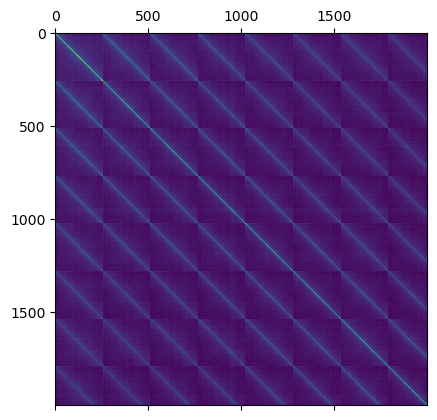

In [9]:
plt.matshow(C[:2000, :2000])

In [24]:
idx = torch.triu_indices(256*256, 256*256, offset=0)

In [27]:
Cvalues = C[idx[0], idx[1]]

In [28]:
del data

In [30]:
del C

In [31]:
labels = (idx[0] - idx[1])//256

RuntimeError: [enforce fail at alloc_cpu.cpp:83] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 17180131328 bytes. Error code 12 (Cannot allocate memory)

In [ ]:
unique_labels, labels_count = labels.unique(dim=0, return_counts=True)
res = torch.zeros_like(unique_labels, dtype=torch.float).scatter_add_(0, labels, abs(C[idx[0], idx[1]])**2)
res = res / labels_count.float()

In [8]:
kk_list = [kk for kk in range(10, 100, 10)]
time_int = []
time_float = []

In [9]:
for kk in kk_list:
    idx = torch.triu_indices(kk**2, kk**2, offset=0)
    labels = (idx[0]//kk - idx[1]//kk)**2 + (idx[0]%kk - idx[1]%kk)**2

    time0 = time.time()
    unique_labels, labels_count = labels.unique(dim=0, return_counts=True)
    time1 = time.time()
    time_int.append(time1 - time0)
    print('time unique', time1 - time0)

time unique 0.04153609275817871
time unique 0.3989982604980469
time unique 2.16976261138916
time unique 6.828014612197876
time unique 16.628199100494385
time unique 34.709367513656616
time unique 64.03415012359619
time unique 109.0688967704773
time unique 176.04861640930176


In [10]:
for kk in kk_list:
    idx = torch.triu_indices(kk**2, kk**2, offset=0)
    labels = ((idx[0]//kk - idx[1]//kk)**2 + (idx[0]%kk - idx[1]%kk)**2)**.5

    time0 = time.time()
    unique_labels, labels_count = labels.unique(dim=0, return_counts=True)
    time1 = time.time()
    time_float.append(time1 - time0)
    print('time unique', time1 - time0)

time unique 0.14786672592163086
time unique 0.42517757415771484
time unique 2.155390739440918
time unique 6.6225504875183105
time unique 16.551210165023804
time unique 34.780508041381836
time unique 64.74529099464417
time unique 109.83224034309387
time unique 176.7178726196289


In [2]:
time_float = [0.14786672592163086,
0.42517757415771484,
2.155390739440918,
6.6225504875183105,
16.551210165023804,
34.780508041381836,
64.74529099464417,
109.83224034309387,
176.7178726196289]

time_int = [0.04153609275817871,
0.3989982604980469,
2.16976261138916,
6.828014612197876,
16.628199100494385,
34.709367513656616,
64.03415012359619,
109.0688967704773,
176.04861640930176]

kk_list = [kk for kk in range(10, 100, 10)]

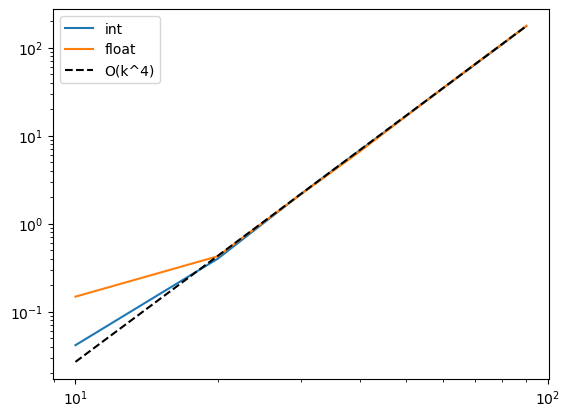

In [7]:
fig, ax = plt.subplots()
ax.plot(kk_list, time_int, label='int')
ax.plot(kk_list, time_float, label='float')
ax.plot(kk_list, time_int[-1]*(np.array(kk_list)/kk_list[-1])**4, 'k--', label='O(k^4)')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [6]:
kk = 5
idx = torch.triu_indices(kk**2, kk**2, offset=0)
labels = ((idx[0]//kk - idx[1]//kk)**2 + (idx[0]%kk - idx[1]%kk)**2)
labels.sort()

torch.return_types.sort(
values=tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
        

# Correlation function

In [2]:
import torch
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt

In [3]:
# file = '/home/sclocchi/data/correlations_deltaX-t_100_250-magnitude_correlation_function.pk'
def file_name(t):
    return f'/home/sclocchi/data/correlations_deltaX-t_{t}_250-magnitude_correlation_function.pk'

def file_name_mean(t):
    return f'/home/sclocchi/data/correlations_deltaX-t_{t}_250-magnitude_mean.pt'


corr_fun = {}
susc = {}
magn = {}

for time in range(25, 251, 25):
    file = file_name(time)
    with open(file, 'rb') as f:
        data = pickle.load(f)

    corr_fun[time] = data['correlation_function']
    susc[time] = data['susceptibility']
    dist = data['labels']

    file = file_name_mean(time)
    # with open(file, 'rb') as f:
    data = torch.load(file)
    magn[time] = data['mean']

    print(time, magn[time])


25 0.1336657
50 0.1759159
75 0.21757472
100 0.26441658
125 0.32531938
150 0.40917546
175 0.53004354
200 0.6914571
225 0.88476574
250 1.1243635


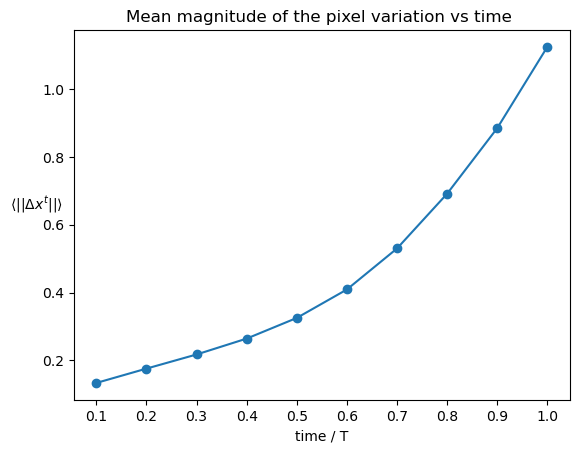

In [4]:
fig, ax = plt.subplots()

xval = [time for time in magn.keys()]
yval = [magn[time] for time in magn.keys()]

ax.plot(xval, yval, 'o-' ,)
    # ax.semilogy(time, np.exp(time**1/1e3)-1, 'o' ,label=f't={time}')
# ax.legend()
ax.set_xlabel('time / T')
ax.set_ylabel('$\langle ||\Delta x^t||\\rangle$', rotation=0)
xticks = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
xlab = [str(xt/250) for xt in xticks]
yticks = [0.2, 0.4, 0.6, 0.8, 1.0,]
ylab = [str(yt) for yt in yticks]
ax.set_xticks(xticks, xlab)
ax.set_yticks(yticks, ylab)
plt.minorticks_off()
plt.title('Mean magnitude of the pixel variation vs time ')
# fig.savefig('../../plots/forw_back_corr-mean_magnitude.pdf', dpi = 300, bbox_inches='tight')
plt.show()

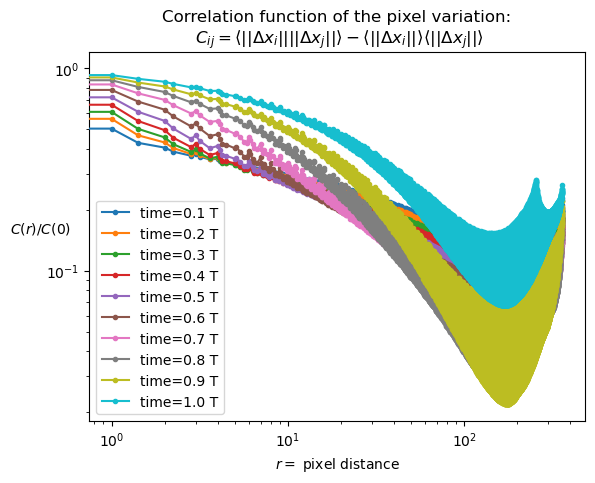

In [5]:
fig, ax = plt.subplots()

for it,time in enumerate(corr_fun.keys()):
    # ax.plot(dist, corr_fun[time]/corr_fun[time][0], '.-' ,label=f'time={time/250} T', zorder=10-it)
    # ax.plot(dist, corr_fun[time]/magn[time]**0, '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)
    # ax.loglog(dist, corr_fun[time]/corr_fun[250]/(corr_fun[time][0]/corr_fun[250][0]), '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)
    ax.loglog(dist, corr_fun[time]/ corr_fun[time][0], '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)

ax.set_xlabel('$r=$ pixel distance')
ax.set_ylabel('$C(r)/C(0)$', rotation=0)
ax.legend()
# ax.set_xlim([0,200])
plt.title('Correlation function of the pixel variation:\n $C_{ij} = \langle ||\Delta x_i|| ||\Delta x_j||\\rangle - \langle ||\Delta x_i|| \\rangle \langle ||\Delta x_j||\\rangle$')

# fig.savefig('../../plots/forw_back_corr-corr_fun.png', dpi = 300, bbox_inches='tight')

plt.show()

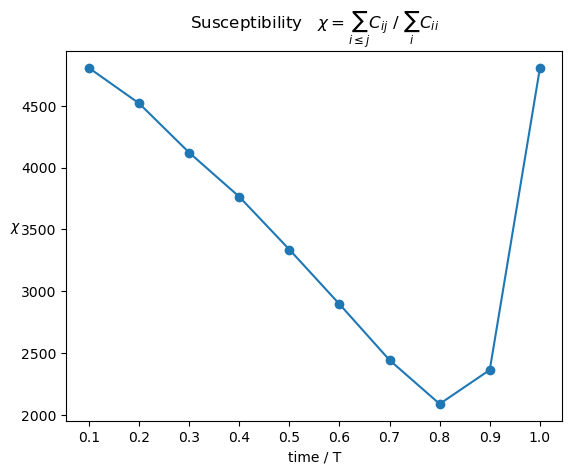

In [6]:
fig, ax = plt.subplots()

xval = [time for time in susc.keys()]
yval = [susc[time]/corr_fun[time][0]/256**2 for time in susc.keys()]

ax.plot(xval, yval, 'o-' ,)

ax.set_xlabel('time / T')
ax.set_ylabel('$\chi$', rotation=0)
xticks = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
xlab = [str(xt/250) for xt in xticks]
yticks = [0.2, 0.4, 0.6, 0.8, 1.0,]
ylab = [str(yt) for yt in yticks]
ax.set_xticks(xticks, xlab)
# ax.set_yticks(yticks, ylab)
plt.minorticks_off()

plt.title('Susceptibility   $\chi= \sum_{i\leq j} C_{ij}\ /\ \sum_{i} C_{ii}$')
# ax.set_xscale('linear')
# ax.set_yscale('linear')
# fig.savefig('../../plots/forw_back_corr-susceptibility.pdf', dpi = 300, bbox_inches='tight')

plt.show()

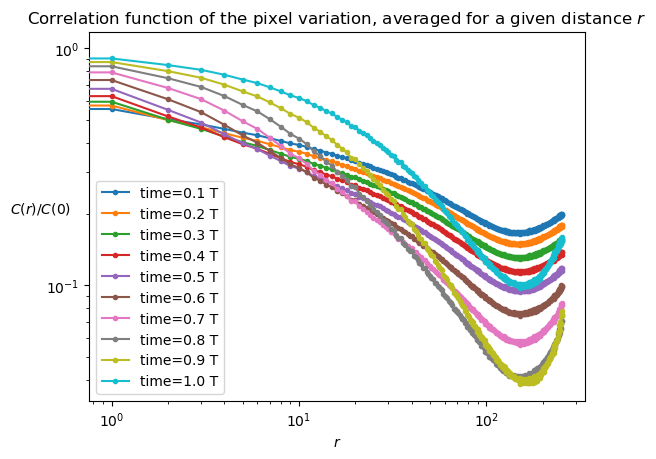

In [7]:
# Moving average of the correlation function
# Make bin of distances and average the correlation function in each bin
# The bin size is 1 pixel

averaged_corr_fun = {}

fig, ax = plt.subplots()

for it,time in enumerate(corr_fun.keys()):
    bin_size = 1
    bins = torch.arange(0, 256, bin_size)
    bin_idx = torch.bucketize(torch.tensor(dist), bins)
    bin_idx = bin_idx - 1
    bin_idx = bin_idx.clamp(0, len(bins)-1)
    bin_idx = bin_idx.long()

    bin_mean = torch.zeros_like(bins, dtype=torch.float)
    bin_count = torch.zeros_like(bins, dtype=torch.float)
    for i in range(len(bins)):
        bin_mean[i] = (corr_fun[time][bin_idx == i].mean()).item()
        bin_count[i] = (bin_idx == i).sum()

    averaged_corr_fun[time] = bin_mean
    # ax.loglog(bins, bin_mean/magn[time]**2, '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)

min_dist = {}
for it, time in enumerate(averaged_corr_fun.keys()):
    ax.loglog(bins, averaged_corr_fun[time]/averaged_corr_fun[time][0], '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)
    # ax.loglog(bins, averaged_corr_fun[time]/averaged_corr_fun[250]/(averaged_corr_fun[time][0]/averaged_corr_fun[250][0]), '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)
    min_dist[time] = bins[torch.argmin(averaged_corr_fun[time]/averaged_corr_fun[250])]

ax.set_xlabel('$r$')
ax.set_ylabel('$C(r)/C(0)$', rotation=0)
ax.legend()
# ax.loglog(bins, 1.1*np.exp(-(bins.float()/30)**(0.5)), 'k--', label='r^-1')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,200])
plt.title('Correlation function of the pixel variation, averaged for a given distance $r$')

# fig.savefig('../../plots/forw_back_corr-corr_fun_averaged.pdf', dpi = 300, bbox_inches='tight')
plt.show()


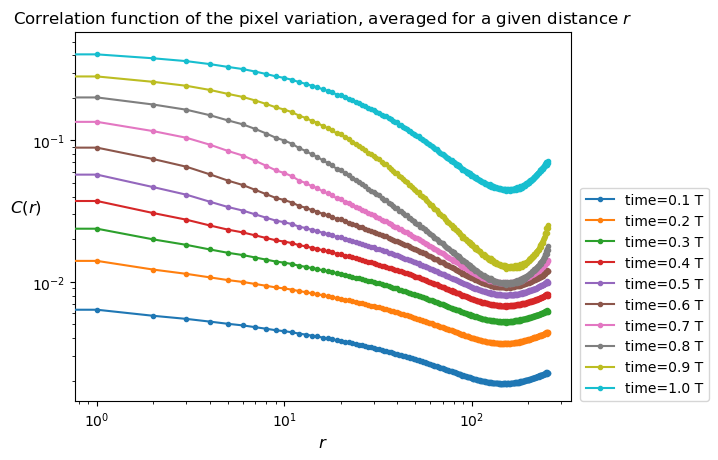

In [13]:
fig, ax = plt.subplots()

for it, time in enumerate(averaged_corr_fun.keys()):
    # ax.loglog(bins, averaged_corr_fun[time]/averaged_corr_fun[time][0], '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)
    ax.loglog(bins, averaged_corr_fun[time], '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)
    # ax.loglog(bins, averaged_corr_fun[time]/averaged_corr_fun[250]/(averaged_corr_fun[time][0]/averaged_corr_fun[250][0]), '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)

ax.set_xlabel('$r$', fontsize=12)
ax.set_ylabel('$C(r)$', rotation=0, fontsize=12)
ax.legend(loc=(1.02,0))
# ax.loglog(bins, 1.1*np.exp(-(bins.float()/30)**(0.5)), 'k--', label='r^-1')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,200])
plt.title('Correlation function of the pixel variation, averaged for a given distance $r$')

# fig.savefig('../../plots/forw_back_corr-corr_fun_averaged-unnormalized.pdf', dpi = 300, bbox_inches='tight')
plt.show()

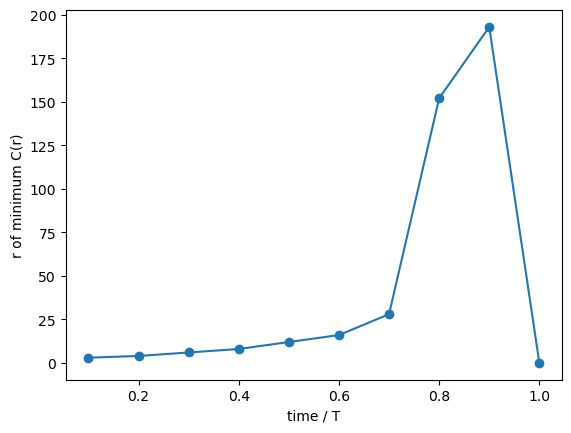

In [65]:
fig, ax = plt.subplots()

xval = [time/250 for time in min_dist.keys()]
yval = [min_dist[time] for time in min_dist.keys()]

ax.plot(xval, yval, 'o-' ,)

ax.set_xlabel('time / T')
ax.set_ylabel('r of minimum C(r)')
plt.show()

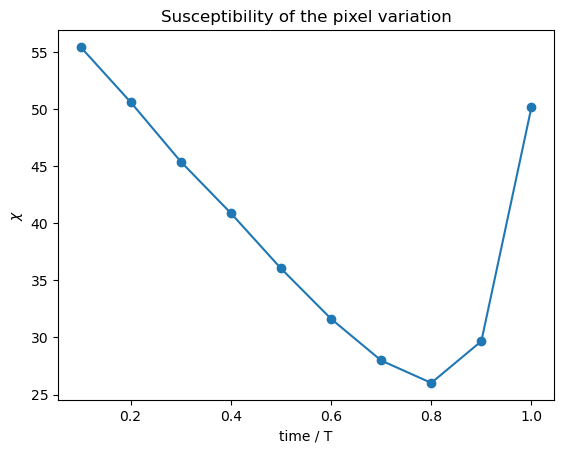

In [62]:
# Susceptibility from the moving average of the correlation function
fig, ax = plt.subplots()

for it,time in enumerate(corr_fun.keys()):
    bin_size = 1
    bins = torch.arange(0, 256, bin_size)
    bin_idx = torch.bucketize(torch.tensor(dist), bins)
    bin_idx = bin_idx - 1
    bin_idx = bin_idx.clamp(0, len(bins)-1)
    bin_idx = bin_idx.long()

    bin_mean = torch.zeros_like(bins, dtype=torch.float)
    bin_count = torch.zeros_like(bins, dtype=torch.float)
    for i in range(len(bins)):
        bin_mean[i] = (corr_fun[time][bin_idx == i].mean()).item()
        bin_count[i] = (bin_idx == i).sum()

    # susc[time] = (bin_mean/(1-magn[time]**2)).sum().item()
    susc[time] = (bin_mean/bin_mean[0]).sum().item()

xval = [time/250 for time in susc.keys()]
yval = [susc[time] for time in susc.keys()]

ax.plot(xval, yval, 'o-' ,)
# ax.semilogy(time, np.exp(time**1/1e3)-1, 'o' ,label=f't={time}')
# ax.legend()
ax.set_xlabel('time / T')
ax.set_ylabel('$\chi$')
xticks = [25, 50, 75, 100, 125, 150, 200, 250]
xlab = [str(xt/250) for xt in xticks]
yticks = [0.2, 0.4, 0.6, 0.8, 1.0,]
ylab = [str(yt) for yt in yticks]
# ax.set_xticks(xticks, xlab)
# ax.set_yticks(yticks, ylab)
plt.minorticks_off()
plt.title('Susceptibility of the pixel variation')
# fig.savefig('../../plots/forw_back_corr-susceptibility.png', dpi = 300, bbox_inches='tight')
plt.show()

[254.92155 254.93921 254.94313 254.9451  254.95097 254.96078 254.9745
 255.      255.00197 255.00784 255.01569 255.01764 255.03137 255.03333
 255.03922 255.04901 255.0549  255.06862 255.07057 255.08038 255.09605
 255.1235  255.12546 255.13133 255.1431  255.14897 255.15486 255.15681
 255.15877 255.16269 255.18033 255.19012 255.196   255.20384 255.21167
 255.21951 255.22147 255.22539 255.22736 255.23715 255.2489  255.26457
 255.26653 255.27437 255.28024 255.2822  255.29002 255.31354 255.32724
 255.33116 255.34486 255.35074 255.36053 255.36249 255.36836 255.37816
 255.38402 255.39186 255.40947 255.41534 255.42514 255.43102 255.4408
 255.4545  255.4721  255.47603 255.47798 255.48581 255.49364 255.50146
 255.51517 255.51907 255.52495 255.53865 255.54843 255.55038 255.55626
 255.56212 255.56604 255.60126 255.61885 255.62473 255.63255 255.6345
 255.64233 255.64429 255.65015 255.6658  255.69122 255.69708 255.70491
 255.70686 255.72055 255.72641 255.73814 255.75966 255.76552 255.78311
 255.7850

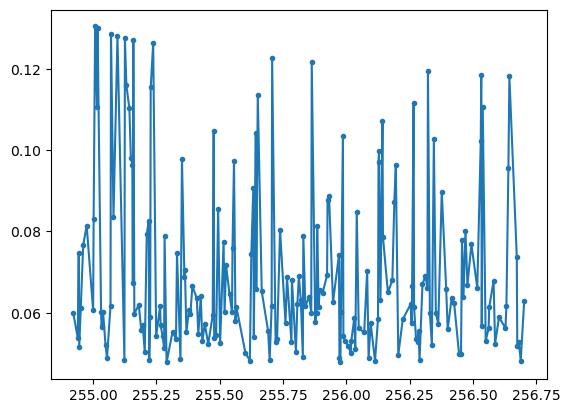

In [39]:
kk = 15970
dk = 200
print(dist[kk:kk+dk])
print(corr_fun[250][kk:kk+dk])
plt.plot(dist[kk:kk+dk], corr_fun[250][kk:kk+dk], '.-')

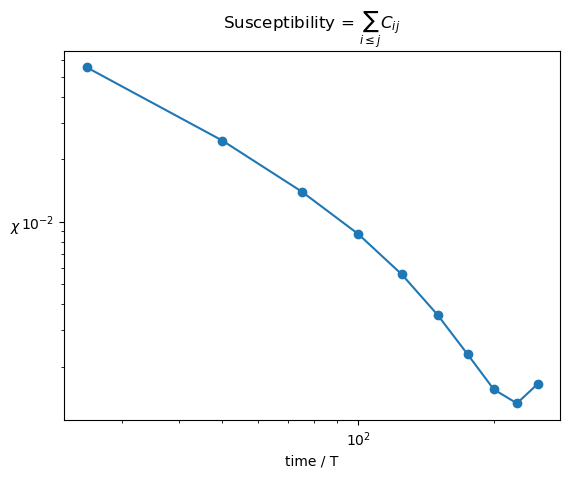

In [61]:
fig, ax = plt.subplots()

xval = [time for time in susc.keys()]
yval = [susc[time]/corr_fun[time][0]/256**2 for time in susc.keys()]

ax.loglog(xval, yval, 'o-' ,)
    # ax.semilogy(time, np.exp(time**1/1e3)-1, 'o' ,label=f't={time}')
# ax.legend()
ax.set_xlabel('time / T')
ax.set_ylabel('$\chi$', rotation=0)
# xticks = [25, 50, 75, 100, 125, 150, 200, 250]
# xlab = [str(xt/250) for xt in xticks]
# yticks = [0.2, 0.4, 0.6, 0.8, 1.0,]
# ylab = [str(yt) for yt in yticks]
# ax.set_xticks(xticks, xlab)
# ax.set_yticks(yticks, ylab)
# plt.minorticks_off()
plt.title('Susceptibility = $\sum_{i\leq j} C_{ij}$')
# fig.savefig('../../plots/forw_back_corr-susceptibility.png', dpi = 300, bbox_inches='tight')
plt.show()

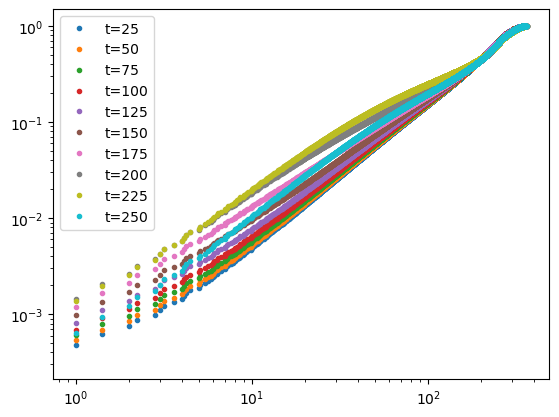

In [56]:
fig, ax = plt.subplots()
for time in corr_fun.keys():
    ax.loglog(dist, np.cumsum(corr_fun[time])/np.cumsum(corr_fun[time])[-1], '.' ,label=f't={time}')
ax.legend()
# ax.set_xlim([0,200])
plt.show()


# plt.loglog(data['labels'], data['correlation_function'], '.')

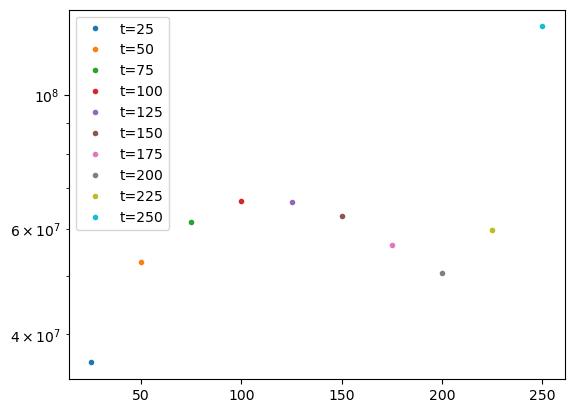

In [30]:
fig, ax = plt.subplots()
for time in susc.keys():
    ax.semilogy(time, susc[time]/magn[time]**1, '.' ,label=f't={time}')
ax.legend()
plt.show()

In [1]:
fig, ax = plt.subplots()

xval = [time for time in susc.keys()]
yval = [magn[time] for time in susc.keys()]

ax.loglog(xval, yval, 'o-' ,)
    # ax.semilogy(time, np.exp(time**1/1e3)-1, 'o' ,label=f't={time}')
# ax.legend()
plt.show()

NameError: name 'plt' is not defined

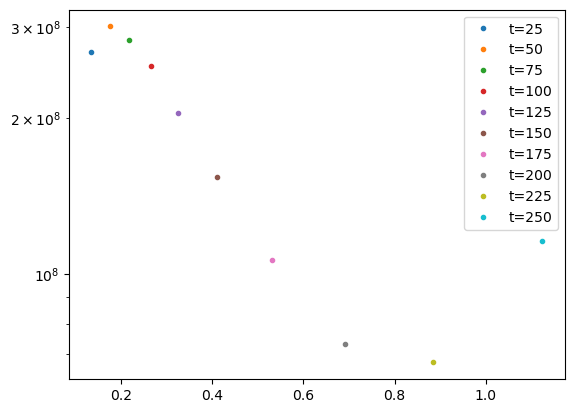

In [45]:
fig, ax = plt.subplots()
for time in susc.keys():
    ax.semilogy(magn[time], susc[time]/magn[time]**2, '.' ,label=f't={time}')
ax.legend()
plt.show()

# Spin-like Correlation function

In [1]:
import torch
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt

In [2]:
# file = '/home/sclocchi/data/correlations_deltaX-t_100_250-magnitude_correlation_function.pk'
def file_name(t):
    return f'/home/sclocchi/data/correlations_deltaX-t_{t}_250-spin_correlation_function.pk'

# def file_name_mean(t):
#     return f'/home/sclocchi/data/correlations_deltaX-t_{t}_250-magnitude_mean.pt'


corr_fun = {}
susc = {}
# magn = {}

for time in range(25, 251, 25):
    file = file_name(time)
    with open(file, 'rb') as f:
        data = pickle.load(f)

    corr_fun[time] = data['correlation_function']
    susc[time] = data['susceptibility']
    dist = data['labels']

    # file = file_name_mean(time)
    # # with open(file, 'rb') as f:
    # data = torch.load(file)
    # magn[time] = data['mean']

    # print(time, magn[time])


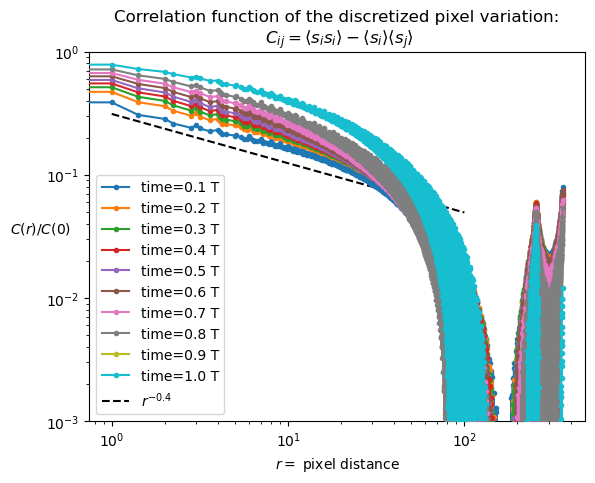

In [9]:
fig, ax = plt.subplots()

for it,time in enumerate(corr_fun.keys()):
    ax.loglog(dist, corr_fun[time]/ corr_fun[time][0]**0, '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)

xr = np.logspace(0,2)
ax.loglog(xr, .3*(xr/xr[1])**(-0.4), 'k--', label='$r^{-0.4}$')

ax.set_xlabel('$r=$ pixel distance')
ax.set_ylabel('$C(r)/C(0)$', rotation=0)
ax.legend()
# ax.set_xlim([0,200])
plt.title('Correlation function of the discretized pixel variation:\n $C_{ij} = \langle s_i s_i\\rangle - \langle s_i \\rangle \langle s_j\\rangle$')


ax.set_ylim([1e-3,1])

# fig.savefig('../../plots/forw_back_corr-image_spin_corr_fun.png', dpi = 300, bbox_inches='tight')
# fig.savefig('../../plots/forw_back_corr-image_spin_corr_fun-loglog.png', dpi = 300, bbox_inches='tight')

plt.show()

In [13]:
corr_fun[time][0]

0.99757427

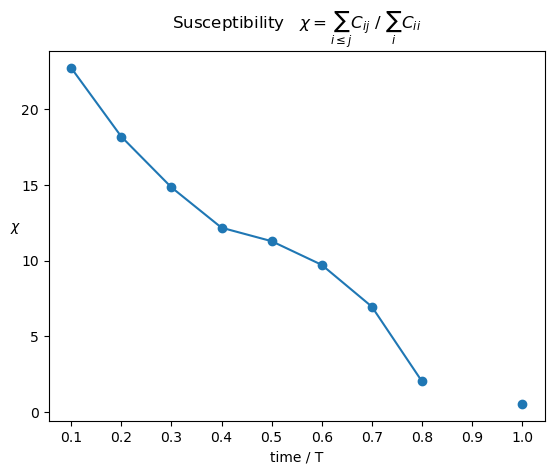

In [5]:
fig, ax = plt.subplots()

xval = [time for time in susc.keys()]
yval = [susc[time]/corr_fun[time][0]/256**2 for time in susc.keys()]

ax.plot(xval, yval, 'o-' ,)

ax.set_xlabel('time / T')
ax.set_ylabel('$\chi$', rotation=0)
xticks = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
xlab = [str(xt/250) for xt in xticks]
yticks = [0.2, 0.4, 0.6, 0.8, 1.0,]
ylab = [str(yt) for yt in yticks]
ax.set_xticks(xticks, xlab)
# ax.set_yticks(yticks, ylab)
plt.minorticks_off()

plt.title('Susceptibility   $\chi= \sum_{i\leq j} C_{ij}\ /\ \sum_{i} C_{ii}$')
# ax.set_xscale('linear')
# ax.set_yscale('linear')
# fig.savefig('../../plots/forw_back_corr-susceptibility.pdf', dpi = 300, bbox_inches='tight')

plt.show()

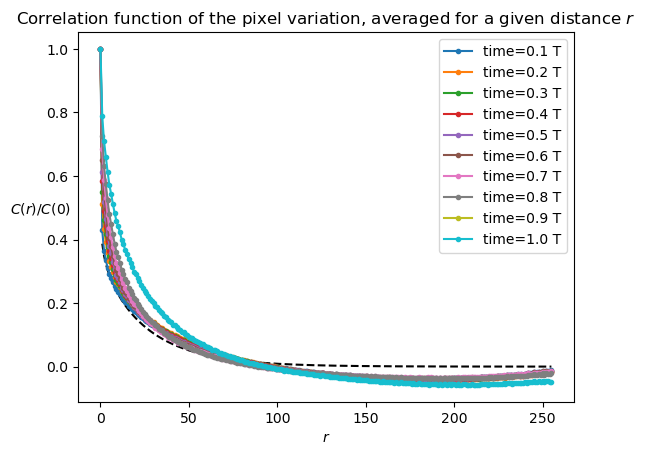

In [6]:
# Moving average of the correlation function
# Make bin of distances and average the correlation function in each bin
# The bin size is 1 pixel

averaged_corr_fun = {}

fig, ax = plt.subplots()

for it,time in enumerate(corr_fun.keys()):
    bin_size = 1
    bins = torch.arange(0, 256, bin_size)
    bin_idx = torch.bucketize(torch.tensor(dist), bins)
    bin_idx = bin_idx - 1
    bin_idx = bin_idx.clamp(0, len(bins)-1)
    bin_idx = bin_idx.long()

    bin_mean = torch.zeros_like(bins, dtype=torch.float)
    bin_count = torch.zeros_like(bins, dtype=torch.float)
    for i in range(len(bins)):
        bin_mean[i] = (corr_fun[time][bin_idx == i].mean()).item()
        bin_count[i] = (bin_idx == i).sum()

    averaged_corr_fun[time] = bin_mean
    # ax.loglog(bins, bin_mean/magn[time]**2, '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)

min_dist = {}
for it, time in enumerate(averaged_corr_fun.keys()):
    ax.loglog(bins, averaged_corr_fun[time]/averaged_corr_fun[time][0], '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)
    # ax.loglog(bins, averaged_corr_fun[time]/averaged_corr_fun[250]/(averaged_corr_fun[time][0]/averaged_corr_fun[250][0]), '.-' ,label=f'time={time/250} T', zorder=10+it, alpha=1)
    min_dist[time] = bins[torch.argmin(averaged_corr_fun[time]/averaged_corr_fun[250])]

ax.set_xlabel('$r$')
ax.set_ylabel('$C(r)/C(0)$', rotation=0)
ax.legend()
ax.loglog(bins, .4*bins**(-0.1) *np.exp(-(bins.float()/30)**(1)), 'k--', label='r^-1')
ax.set_yscale('linear')
ax.set_xscale('linear')
# ax.set_xlim([0,200])
plt.title('Correlation function of the pixel variation, averaged for a given distance $r$')

# fig.savefig('../../plots/forw_back_corr-corr_fun_averaged.pdf', dpi = 300, bbox_inches='tight')
plt.show()


In [2]:
# file = '../correlations_measurements/diffused_ILSVRC2012_validation/correlations_deltaX-t_10_250-magnitude.pk'
file = '/home/sclocchi/data/correlations_deltaX-t_100_250-spin.pk'

with open(file, 'rb') as f:
    data = pickle.load(f)


In [3]:
print(data.keys())
C = data['corr'].reshape(256*256, 256*256) - data['mean'].reshape(256*256, 1) @ data['mean'].reshape(1, 256*256)

dict_keys(['corr', 'mean'])


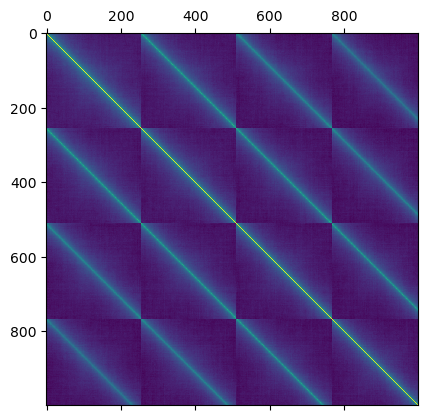

In [14]:
plt.matshow(C[:1000, :1000])

In [10]:
C[3,:10]
# data['mean'][0,:10]

array([0.56179714, 0.60475844, 0.7036057 , 0.99385345, 0.6964339 ,
       0.602544  , 0.54099524, 0.5095444 , 0.47255617, 0.45583105],
      dtype=float32)

In [15]:
1049/3600

0.29138888888888886